In [1]:
import numpy as np
from carUtils import *
from linesUtils import *
from env import *
import glob
import tqdm
from PIL import Image

sensor_locs=Car_specs['sensor_spacing']*3.5-\
                    np.arange(Car_specs['num_sensors'])*Car_specs['sensor_spacing']
        
#load sensor data
T=[]
X=[[],[],[],[],[],[],[],[]]
for file in glob.glob("measurements/*.npy"):
    t=int(file[len("measurements\\measurment"):-4])
    raw_data=np.load(file)
    T+=[t]*raw_data.shape[0]
    for i in range(8):
        X[i]+=list(raw_data[:,i])
        #print(raw_data[:,i].shape)

X=np.array(X)
T=np.array(T)
X=X[:,np.all(X>0,axis=0)]
T=T[np.all(X>0,axis=0)]
T=T[np.all(X<=2500,axis=0)]
X=X[:,np.all(X<=2500,axis=0)]



line_locs=-4+T*0.2


Noise_specs={"sensor noise": None, #we use a uniform distribution rn (maybe fun to change)
             "motor noise": None, #% error between what the input of the motor percentage to the output of the motor percentage
            }

In [2]:
e=Env(Noise_specs=Noise_specs)

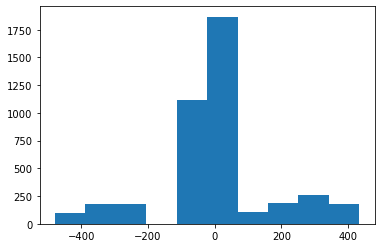

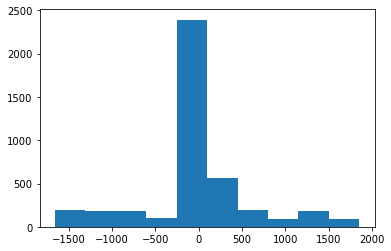

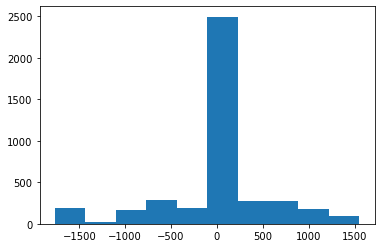

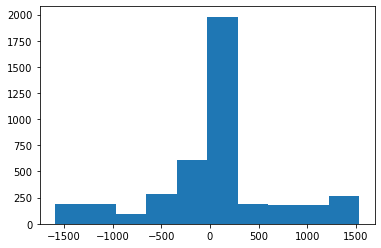

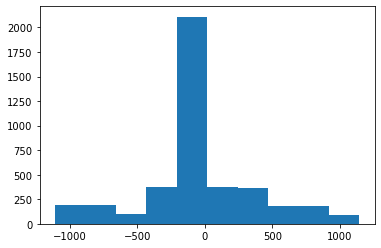

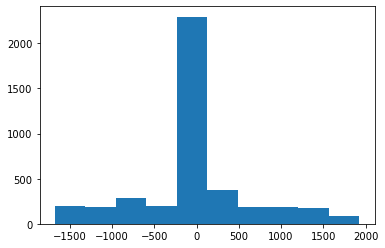

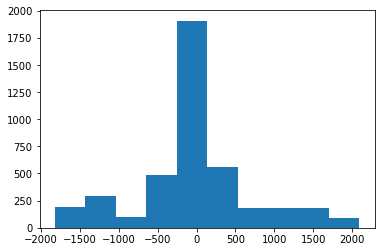

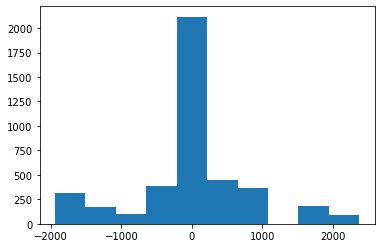

In [22]:
for i in range(8):
    deviation=np.empty(line_locs.shape[0])
    for j,d in enumerate(line_locs):
        dist=np.abs(d-line_locs[i])
        deviation[j]=(e.sensors[i].value(dist)-X[i,j])
    plt.hist(deviation)
    plt.show()

In [4]:
np.abs(d-line_locs[i])

0.7999999999999998

In [5]:
line_locs

array([3.6, 3.6, 3.6, ..., 2.8, 2.8, 2.8])

In [10]:
e.sensors[i].value(dist)

array([1009.32467395])

In [13]:
X[i,j]

573

(array([ 763., 2571.,  112.,   89.,  177.,  178.,    0.,   96.,   89.,
          89.]),
 array([ 412. ,  620.8,  829.6, 1038.4, 1247.2, 1456. , 1664.8, 1873.6,
        2082.4, 2291.2, 2500. ]),
 <BarContainer object of 10 artists>)

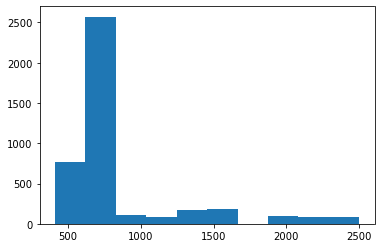

In [17]:
plt.hist(X[0])

In [18]:
deviation

array([-261.16572614])